In [1]:
# run the code from the root directory of the repository (that is, the directory one level up from this file)
# change the path this script is run from to the root directory of the repository
import os
os.chdir('..')
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"

In [2]:
# load the .json file
import json

metadata = json.load(open("data/lindenthal-camera-traps/metadata.json"))

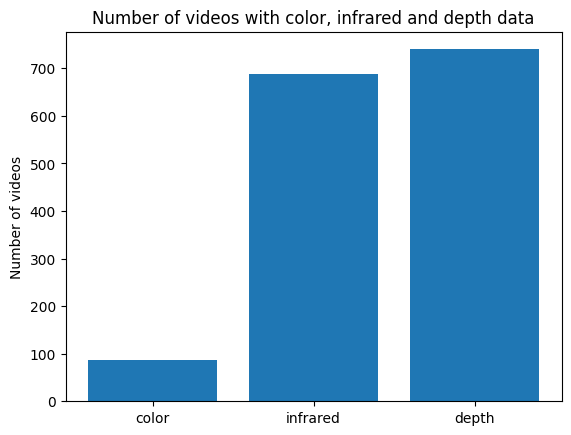

Number of videos with color data: 87
Number of videos with infrared data: 688
Number of videos with depth data: 740


In [3]:
# plot how many of the videos have color, infrared and depth data
import matplotlib.pyplot as plt
import numpy as np

color = 0
infrared = 0
depth = 0

for video in metadata['videos'].keys():
    if metadata['videos'][video]['types']['color']:
        color += 1
    if metadata['videos'][video]['types']['infrared']:
        infrared += 1
    if metadata['videos'][video]['types']['depth']:
        depth += 1

fig, ax = plt.subplots()
ax.bar(['color', 'infrared', 'depth'], [color, infrared, depth])
ax.set_ylabel('Number of videos')
ax.set_title('Number of videos with color, infrared and depth data')
plt.show()
print(f'Number of videos with color data: {color}')
print(f'Number of videos with infrared data: {infrared}')
print(f'Number of videos with depth data: {depth}')

In [4]:
# plot how many of the videos have color, infrared and depth data
import matplotlib.pyplot as plt
import numpy as np

all_types = 0
color_infrared = 0
color_depth = 0
infrared_depth = 0
only_color = 0
only_infrared = 0
only_depth = 0
no_data = 0

for video in metadata['videos'].keys():
    if metadata['videos'][video]['types']['color'] and metadata['videos'][video]['types']['depth']:
        color_depth += 1
    elif metadata['videos'][video]['types']['infrared'] and metadata['videos'][video]['types']['depth']:
        infrared_depth += 1
    elif metadata['videos'][video]['types']['infrared']:
        only_infrared += 1
    else:
        no_data += 1

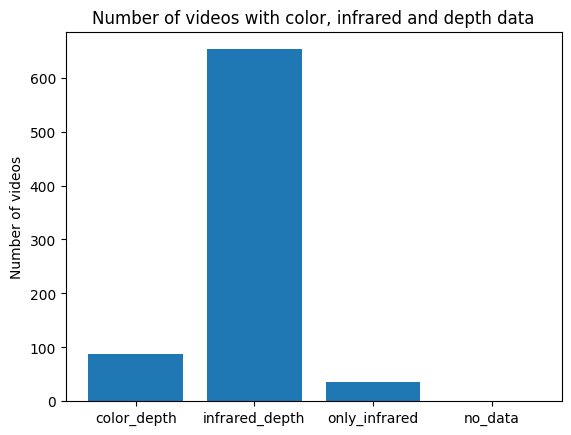

Number of videos with color and depth data: 87
Number of videos with infrared and depth data: 653
Number of videos with only infrared data: 35
Number of videos with no data: 0


In [5]:
fig, ax = plt.subplots()
ax.bar(['color_depth', 'infrared_depth', 'only_infrared', 'no_data'], [color_depth, infrared_depth, only_infrared, no_data])
ax.set_ylabel('Number of videos')
ax.set_title('Number of videos with color, infrared and depth data')
plt.show()

print(f'Number of videos with color and depth data: {color_depth}')
print(f'Number of videos with infrared and depth data: {infrared_depth}')
print(f'Number of videos with only infrared data: {only_infrared}')
print(f'Number of videos with no data: {no_data}')

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
1: deer
2: goat
3: donkey
4: goose
Total number of images: 350


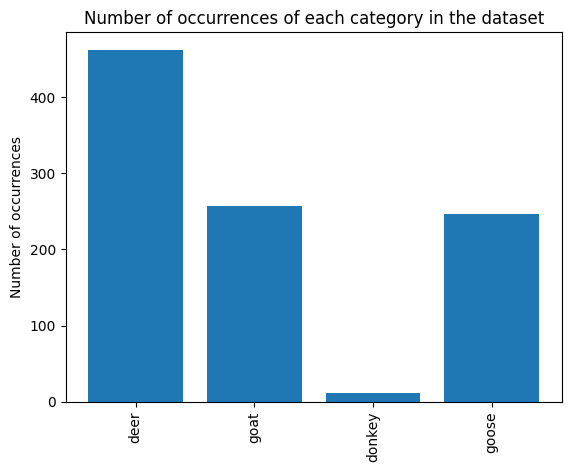

{'deer': 462, 'goat': 257, 'donkey': 11, 'goose': 246}


In [6]:
from pycocotools.coco import COCO

split = "train"
coco = COCO(f"data/lindenthal-camera-traps/lindenthal_coco/{split}.json")
categories = coco.loadCats(coco.getCatIds())
for category in categories:
    print(f"{category['id']}: {category['name']}")

# count the number of occurrences of each category in the dataset
category_counts = {}
for category in categories:
    category_counts[category['name']] = 0

imgIds = coco.getImgIds()
print(f"Total number of images: {len(imgIds)}")
for i, imgId in enumerate(imgIds):
    img = coco.loadImgs([imgId])[0]
    annIds = coco.getAnnIds(imgIds=[img['id']], iscrowd=None)
    anns = coco.loadAnns(annIds)
    for ann in anns:
        category_counts[coco.loadCats([ann['category_id']])[0]['name']] += 1

fig, ax = plt.subplots()
ax.bar(category_counts.keys(), category_counts.values())
ax.set_ylabel('Number of occurrences')
ax.set_title('Number of occurrences of each category in the dataset')
plt.xticks(rotation=90)
plt.show()

print(category_counts)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
1: deer
2: goat
3: donkey
4: goose
Total number of images: 62


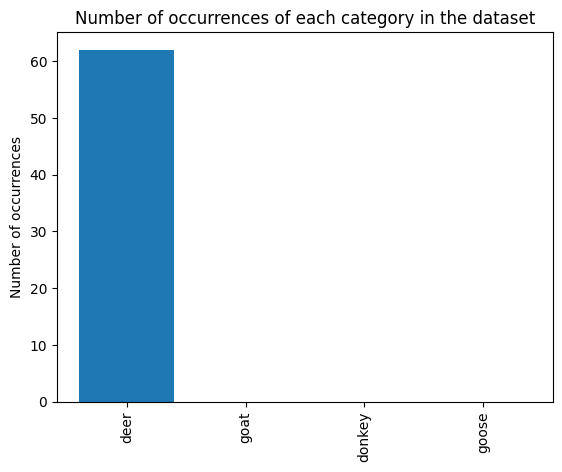

{'deer': 62, 'goat': 0, 'donkey': 0, 'goose': 0}


In [7]:
split = "test"
coco = COCO(f"data/lindenthal-camera-traps/lindenthal_coco/{split}.json")
categories = coco.loadCats(coco.getCatIds())
for category in categories:
    print(f"{category['id']}: {category['name']}")

# count the number of occurrences of each category in the dataset
category_counts = {}
for category in categories:
    category_counts[category['name']] = 0

imgIds = coco.getImgIds()
print(f"Total number of images: {len(imgIds)}")
for i, imgId in enumerate(imgIds):
    img = coco.loadImgs([imgId])[0]
    annIds = coco.getAnnIds(imgIds=[img['id']], iscrowd=None)
    anns = coco.loadAnns(annIds)
    for ann in anns:
        category_counts[coco.loadCats([ann['category_id']])[0]['name']] += 1

fig, ax = plt.subplots()
ax.bar(category_counts.keys(), category_counts.values())
ax.set_ylabel('Number of occurrences')
ax.set_title('Number of occurrences of each category in the dataset')
plt.xticks(rotation=90)
plt.show()

print(category_counts)

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!
1: deer
2: goat
3: goose
Total number of images: 1245


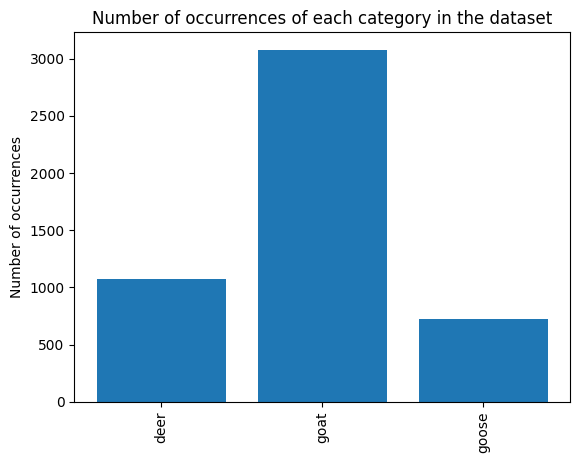

{'deer': 1072, 'goat': 3077, 'goose': 723}


In [8]:
split = "annotations_lindenthal"
coco = COCO(f"data/lindenthal-camera-traps/lindenthal_coco/{split}.json")
categories = coco.loadCats(coco.getCatIds())
for category in categories:
    print(f"{category['id']}: {category['name']}")

# count the number of occurrences of each category in the dataset
category_counts = {}
for category in categories:
    category_counts[category['name']] = 0

imgIds = coco.getImgIds()
print(f"Total number of images: {len(imgIds)}")
for i, imgId in enumerate(imgIds):
    img = coco.loadImgs([imgId])[0]
    annIds = coco.getAnnIds(imgIds=[img['id']], iscrowd=None)
    anns = coco.loadAnns(annIds)
    for ann in anns:
        category_counts[coco.loadCats([ann['category_id']])[0]['name']] += 1

fig, ax = plt.subplots()
ax.bar(category_counts.keys(), category_counts.values())
ax.set_ylabel('Number of occurrences')
ax.set_title('Number of occurrences of each category in the dataset')
plt.xticks(rotation=90)
plt.show()

print(category_counts)

In [9]:
# for every offset, compute the average error
min_error = 1000000000000000000000
for i, offset in enumerate(offsets):
    print(f'Offset: {offset}')
    print(f'Average error: {np.mean(errors[i])}')
    if np.mean(errors[i]) < min_error:
        min_error = np.mean(errors[i])
        best_offset = offset
print(f'Best offset: {best_offset} with error: {min_error}')

NameError: name 'offsets' is not defined

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
COCO categories: deer goat donkey goose
Processing image 1/61


/tmp/ipykernel_563473/3756969366.py:58: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
/tmp/ipykernel_563473/3756969366.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2)


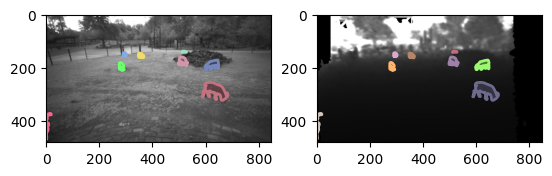

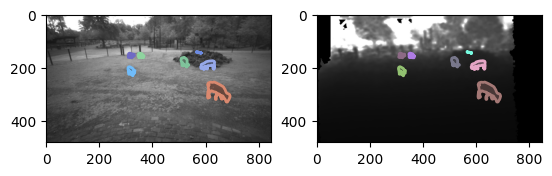

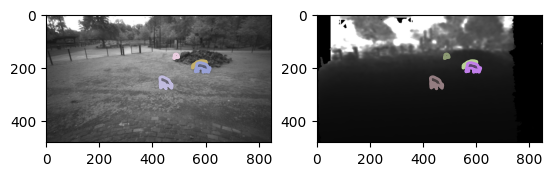

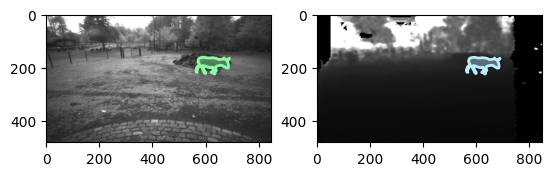

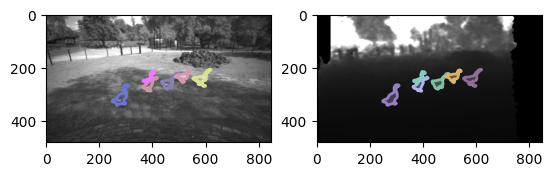

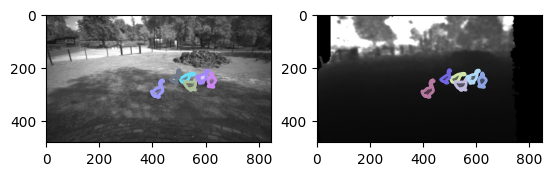

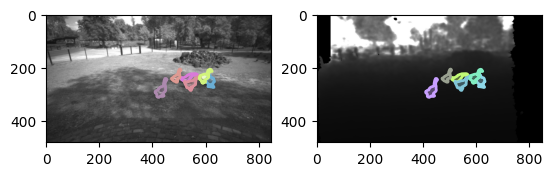

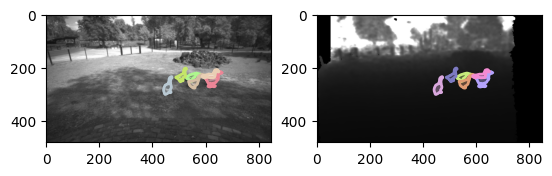

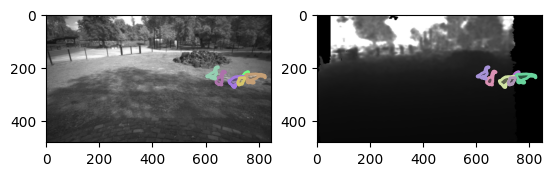

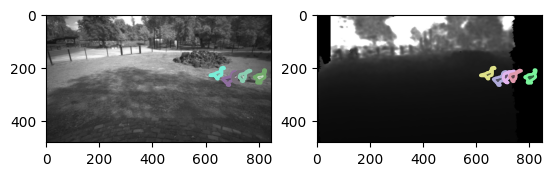

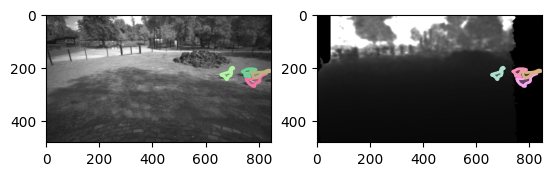

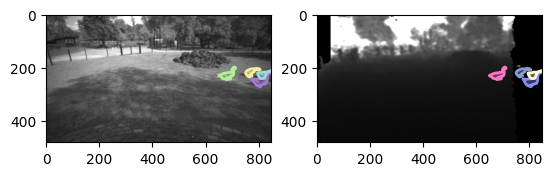

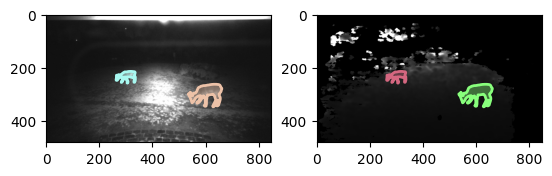

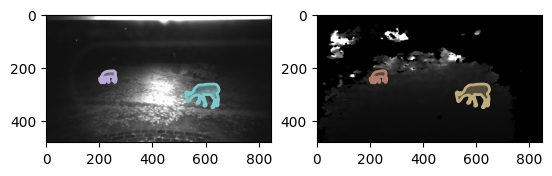

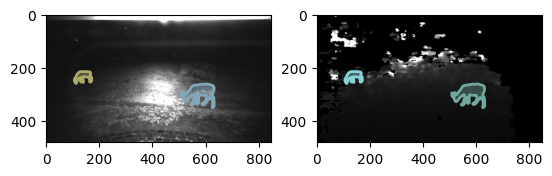

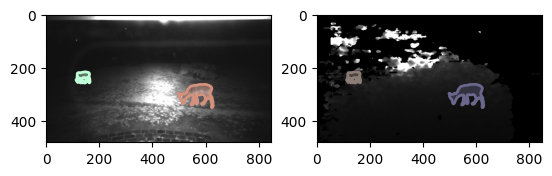

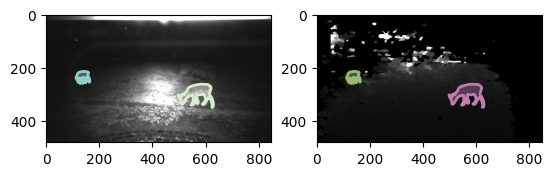

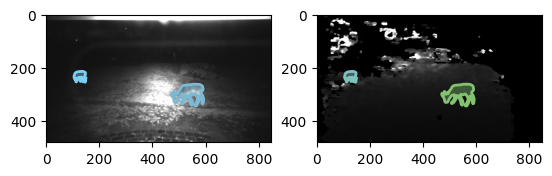

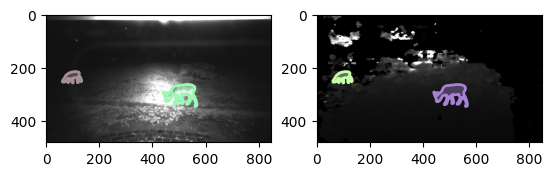

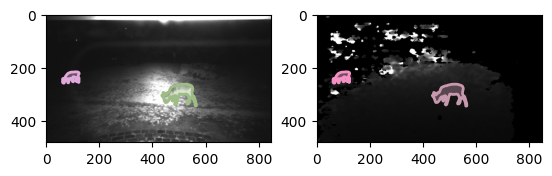

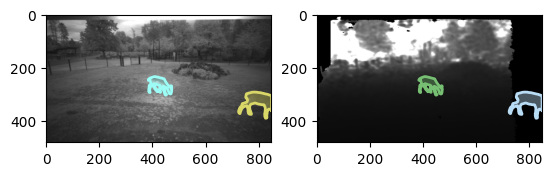

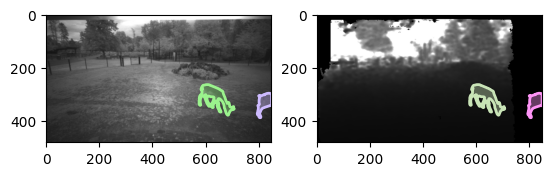

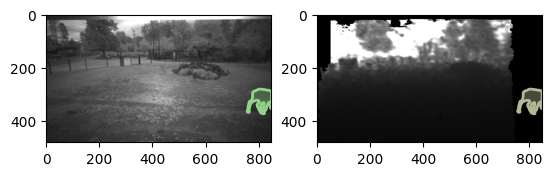

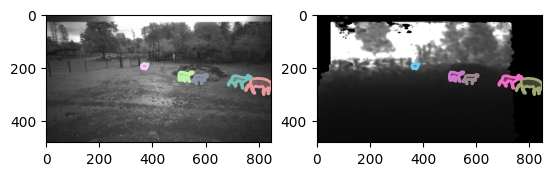

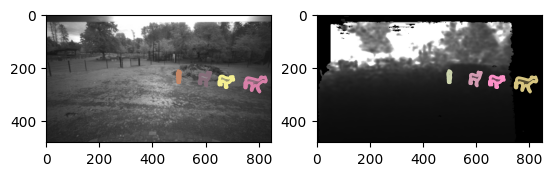

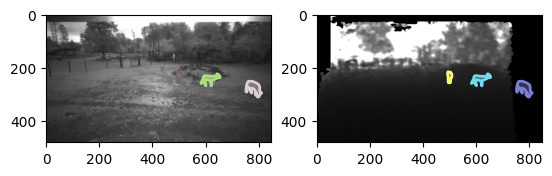

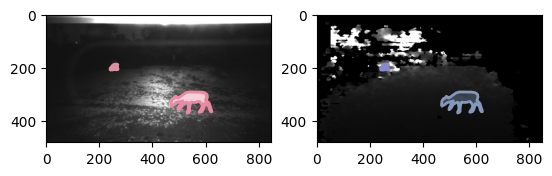

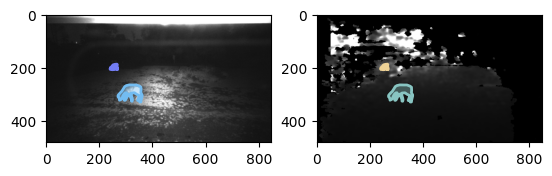

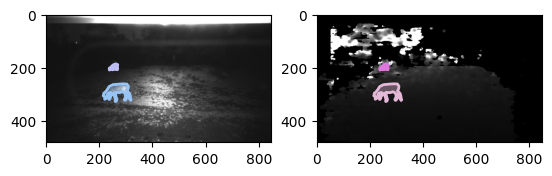

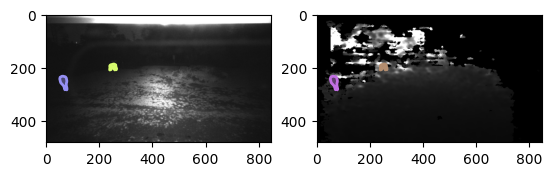

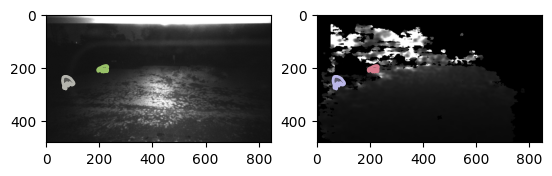

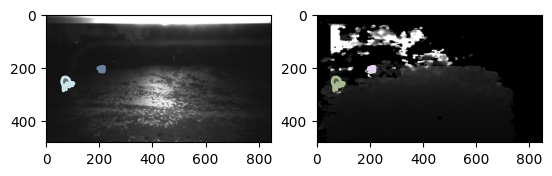

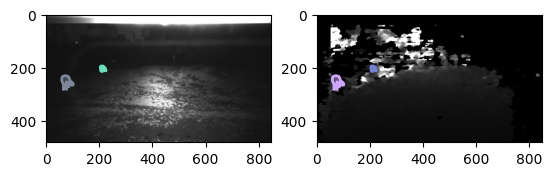

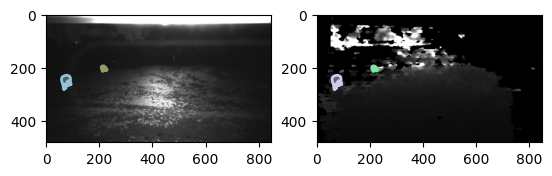

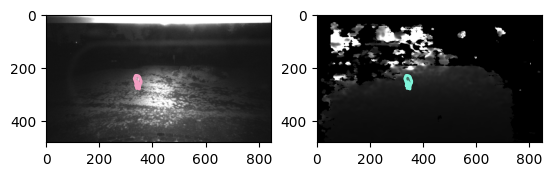

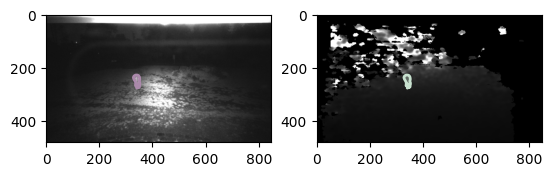

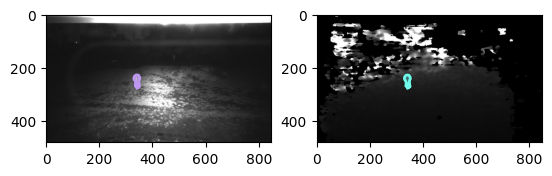

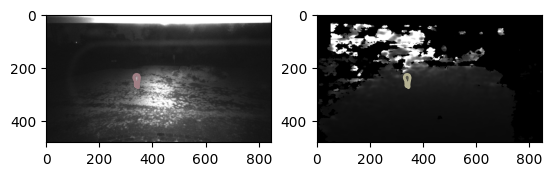

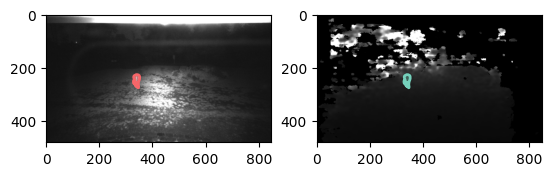

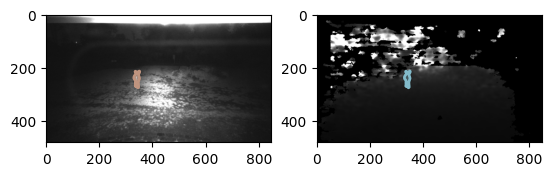

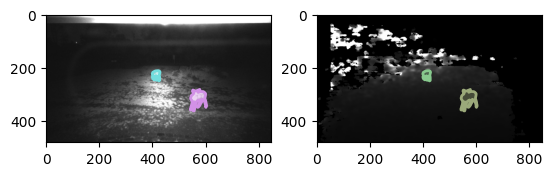

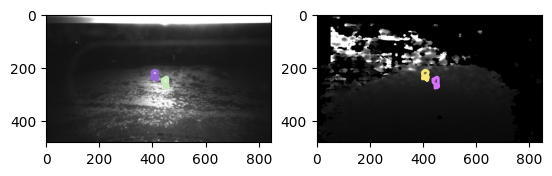

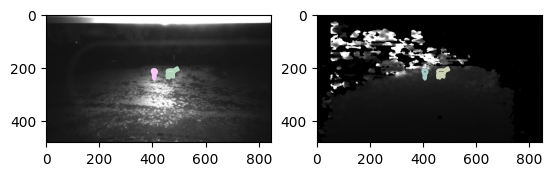

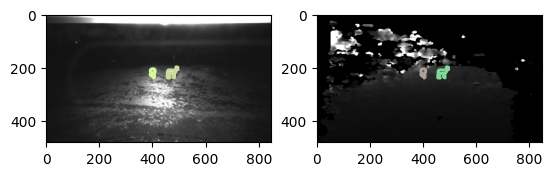

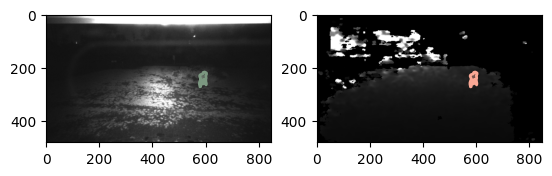

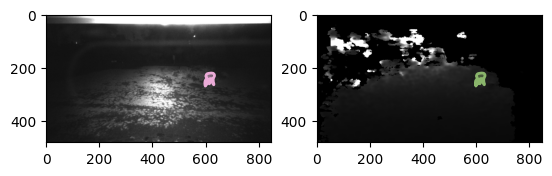

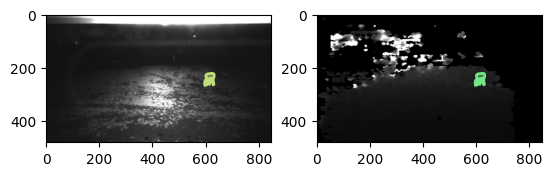

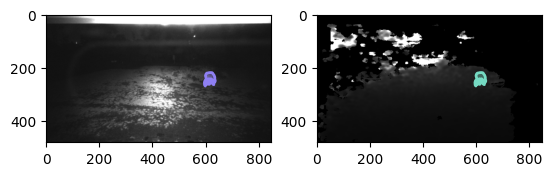

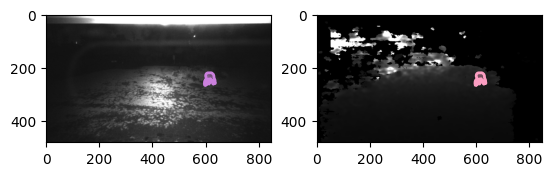

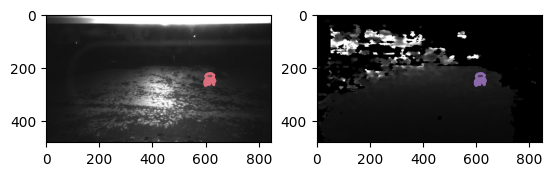

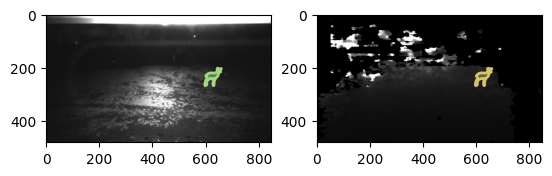

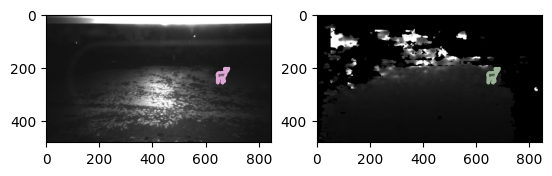

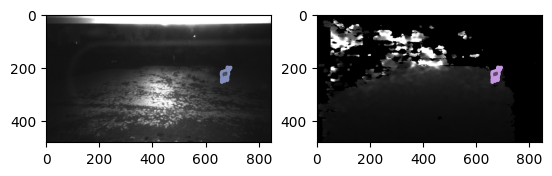

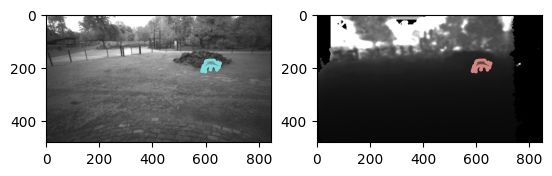

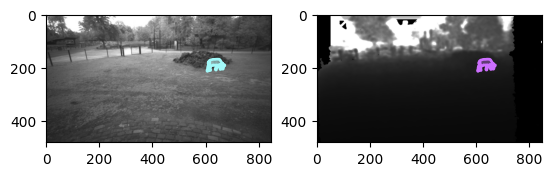

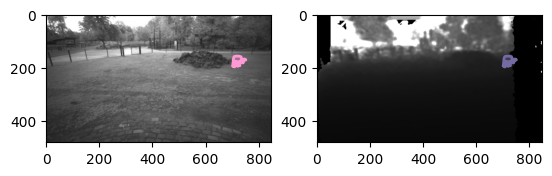

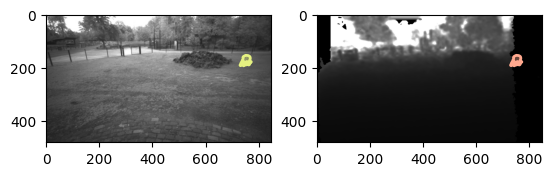

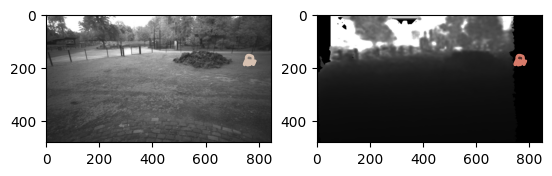

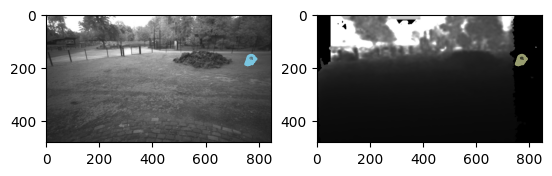

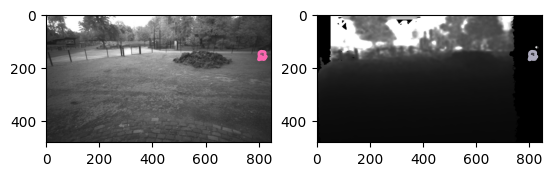

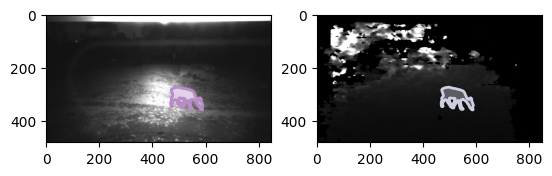

In [22]:
import cv2

# adapted from https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

split = "val_merged"  # or "test"
base_path = "data/lindenthal-camera-traps/lindenthal_coco/"

# initialize COCO api for instance annotations
coco = COCO(base_path + f"{split}.json")

# display COCO categories
cats = coco.loadCats(coco.getCatIds())
cats
nms = [cat['name'] for cat in cats]
print('COCO categories: {}'.format(' '.join(nms)))

# get all images
imgIds = coco.getImgIds()   # NOTE: these are the annotated images!

# loop over all images to show a video
out_video = []
for i, imgId in enumerate(imgIds):
    if i % 100 == 0:
        print(f"Processing image {i+1}/{len(imgIds)}")
    # load image
    img = coco.loadImgs([imgId])[0]
    img_fn = img['file_name'].split("/")
    if len(img_fn) == 2:
        video_name = img_fn[0]
        frame_name = img_fn[1].split(".")[0]
    else:
        video_name = img_fn[0]
        frame_name = img_fn[2].split(".")[0]

    intensity_path = os.path.join(base_path, "images", video_name, "color", frame_name + ".jpg")
    intensity = cv2.imread(intensity_path)
    depth_path = os.path.join(base_path, "images", video_name, "depth", frame_name + ".png")
    depth = cv2.imread(depth_path)

    if intensity is None or depth is None:
        continue

    # load and display instance annotations in a separate window
    annIds = coco.getAnnIds(imgIds=[img['id']], iscrowd=None)
    anns = coco.loadAnns(annIds)
    
    # show the video frame
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(intensity)
    plt.sca(ax1)
    coco.showAnns(anns)
    im = ax2.imshow(depth)
    plt.sca(ax2)
    coco.showAnns(anns)
    
    # save the plot as a frame and append it to the video
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    out_video.append(frame)
    


# save the video
out_video = np.array(out_video)
out_video_writer = cv2.VideoWriter("video.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 5, (out_video.shape[2], out_video.shape[1]))
for frame in out_video:
    out_video_writer.write(frame)
out_video_writer.release()

    # # print the name of each category
    # for ann in anns:
    #     print(coco.loadCats([ann['category_id']])[0]['name'])
        